# CRFでやったことをSVMでやってみる

In [22]:
from type import CrfFeatures, Abbreviation, CrfLabelSequence
import json
from sklearn.model_selection import train_test_split
from util.levenshtein_distance import edit_dist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [23]:
# 前処理した略語データを読み込む
data = list(map(Abbreviation.model_validate, json.load(open("./data/abbreviation.json", "r"))))
data_train: list[Abbreviation] = []
data_test: list[Abbreviation] = []
data_train, data_test = train_test_split(data, test_size=0.2)

In [24]:
X_train = [*map(CrfFeatures.from_abbreviation, data_train)]
y_train = list(map(CrfLabelSequence.from_abbreviation, data_train))
X_test = [*map(CrfFeatures.from_abbreviation, data_test)]
y_test = list(map(CrfLabelSequence.from_abbreviation, data_test))

In [25]:
X_train = CrfFeatures.get_numbered_features(X_train)
X_test = CrfFeatures.get_numbered_features(X_test)

In [26]:
model = SVC(kernel="rbf")

In [27]:
X_train = [item for row in X_train for item in row]
y_train = [item for row in y_train for item in row]
# X_test = [item for row in X_test for item in row]
# y_test = [item for row in y_test for item in row]

In [28]:
# feature_to_int: dict[str, int] = {}
# for row in X_train:
#     for feature in row:
#         if feature not in feature_to_int:
#             feature_to_int[feature] = len(feature_to_int)
# for word in X_test:
#     for mora in word:
#         for feature in mora:
#             if feature not in feature_to_int:
#                 feature_to_int[feature] = len(feature_to_int)
# X_train = [[feature_to_int[feature] for feature in row] for row in X_train]

In [29]:
model.fit(X_train, y_train)

SVC()

In [30]:
correct_n = 0
all_n = len(X_test)
score_list = np.array([0.0] * all_n)  # スコアは 編集距離 / 単語のモーラ数 で定義する

for i, (word, abbr) in enumerate(zip(X_test, y_test)):
    abbr_predict = model.predict(word)
    score_list[i] = (abbr_predict==abbr).mean()
    if (abbr_predict == abbr).all():
        correct_n += 1

In [31]:
correct_n / all_n

0.41732283464566927

In [32]:
score_list.mean()

0.7423817761416186

(array([ 23.,   3.,   3.,   5.,   7.,  27.,  19.,  20.,  38., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

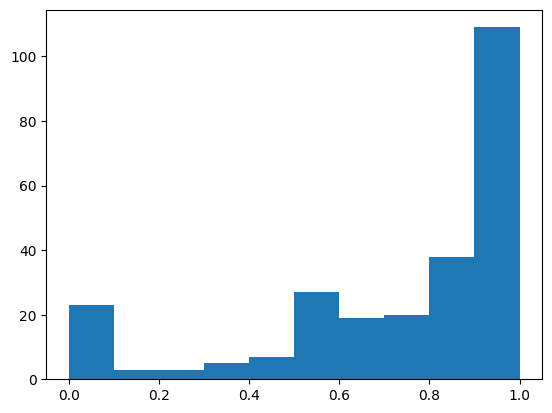

In [33]:
plt.hist(score_list, bins=10)